In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change to your own directory
import os
try: 
    os.chdir("/content/drive/MyDrive/Suicide")
    print("Directory changed")
except OSError:
    print("Error: Can't change the Current Working Directory")

Directory changed


In [ ]:
import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pd # for data manipulation 
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") #ignore warnings

Data Preparation

In [ ]:
# Load dataset
df = pd.read_csv('New Data/Suicide_dataset.csv')
df.reset_index(drop=True, inplace=True)
df.head()

,text,class
0,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so a...,depression
1,"I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within...",depression
2,"So I have been with my bf for 5 months , and he already told me he was depressed. To this week nothing particular happened, but i can now feel hes bothered by it. He does not ask me to sleep toget...",depression
3,"I am so exhausted of this. Just when I think I can finally rest, just when I think maybe things are starting to settle, another hurdle comes flying at me. This month alone we found out my mum coul...",suicide
4,i could feel the strongest connection and still can to my divine self,normal


In [ ]:
df.shape

(30789, 2)

In [ ]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load dataset
df = pd.read_csv('New Data/suicide_final_cleaned.csv')
df.reset_index(drop=True, inplace=True)
df.head()

,text,class,cleaned_text
0,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so a...,depression,recently go breakup say want friend say try talk thing hurt want lose feeling pain stop hurt not cry not want hurt say not want speak not know hurt not know love wish meet painful lose feeling
1,"I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within...",depression,not know navigate feeling not new feeling stretch not understand pleasantly fine suicidal self loathing minute not able step suffer poor mental health year turn week feel ashamed negative thought ...
2,"So I have been with my bf for 5 months , and he already told me he was depressed. To this week nothing particular happened, but i can now feel hes bothered by it. He does not ask me to sleep toget...",depression,month tell depressed week particular happen feel s bother not ask sleep thing etc know not problem aware want ask suffocate clingy thing usually love right kind feeling suggestion gladly accept fr...
3,"I am so exhausted of this. Just when I think I can finally rest, just when I think maybe things are starting to settle, another hurdle comes flying at me. This month alone we found out my mum coul...",suicide,exhausted think finally rest think maybe thing start settle hurdle comes fly month find mum die girlfriend leave parent reveal want divorce grandad hospitalise little sister rush amp possible brai...
4,i could feel the strongest connection and still can to my divine self,normal,feel strong connection divine self


In [ ]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [ ]:
df=df.dropna()
df.drop(['                                                                           text'],axis = 1,inplace = True)
df.head()

,class,cleaned_text
0,depression,recently go breakup say want friend say try talk thing hurt want lose feeling pain stop hurt not cry not want hurt say not want speak not know hurt not know love wish meet painful lose feeling
1,depression,not know navigate feeling not new feeling stretch not understand pleasantly fine suicidal self loathing minute not able step suffer poor mental health year turn week feel ashamed negative thought ...
2,depression,month tell depressed week particular happen feel s bother not ask sleep thing etc know not problem aware want ask suffocate clingy thing usually love right kind feeling suggestion gladly accept fr...
3,suicide,exhausted think finally rest think maybe thing start settle hurdle comes fly month find mum die girlfriend leave parent reveal want divorce grandad hospitalise little sister rush amp possible brai...
4,normal,feel strong connection divine self


In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda text : remove_stopwords(text.lower()))
df.head()

,class,cleaned_text
0,depression,recently go breakup say want friend say try talk thing hurt want lose feeling pain stop hurt cry want hurt say want speak know hurt know love wish meet painful lose feeling
1,depression,know navigate feeling new feeling stretch understand pleasantly fine suicidal self loathing minute able step suffer poor mental health year turn week feel ashamed negative thought covid hard trans...
2,depression,month tell depressed week particular happen feel bother ask sleep thing etc know problem aware want ask suffocate clingy thing usually love right kind feeling suggestion gladly accept frank tell b...
3,suicide,exhausted think finally rest think maybe thing start settle hurdle comes fly month find mum die girlfriend leave parent reveal want divorce grandad hospitalise little sister rush amp possible brai...
4,normal,feel strong connection divine self


In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.split())
df.head()

,class,cleaned_text
0,depression,"[recently, go, breakup, say, want, friend, say, try, talk, thing, hurt, want, lose, feeling, pain, stop, hurt, cry, want, hurt, say, want, speak, know, hurt, know, love, wish, meet, painful, lose,..."
1,depression,"[know, navigate, feeling, new, feeling, stretch, understand, pleasantly, fine, suicidal, self, loathing, minute, able, step, suffer, poor, mental, health, year, turn, week, feel, ashamed, negative..."
2,depression,"[month, tell, depressed, week, particular, happen, feel, bother, ask, sleep, thing, etc, know, problem, aware, want, ask, suffocate, clingy, thing, usually, love, right, kind, feeling, suggestion,..."
3,suicide,"[exhausted, think, finally, rest, think, maybe, thing, start, settle, hurdle, comes, fly, month, find, mum, die, girlfriend, leave, parent, reveal, want, divorce, grandad, hospitalise, little, sis..."
4,normal,"[feel, strong, connection, divine, self]"


In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()

,class,cleaned_text
0,depression,"[recent, go, breakup, say, want, friend, say, tri, talk, thing, hurt, want, lose, feel, pain, stop, hurt, cri, want, hurt, say, want, speak, know, hurt, know, love, wish, meet, pain, lose, feel]"
1,depression,"[know, navig, feel, new, feel, stretch, understand, pleasantli, fine, suicid, self, loath, minut, abl, step, suffer, poor, mental, health, year, turn, week, feel, asham, neg, thought, covid, hard,..."
2,depression,"[month, tell, depress, week, particular, happen, feel, bother, ask, sleep, thing, etc, know, problem, awar, want, ask, suffoc, clingi, thing, usual, love, right, kind, feel, suggest, gladli, accep..."
3,suicide,"[exhaust, think, final, rest, think, mayb, thing, start, settl, hurdl, come, fli, month, find, mum, die, girlfriend, leav, parent, reveal, want, divorc, grandad, hospitalis, littl, sister, rush, a..."
4,normal,"[feel, strong, connect, divin, self]"


In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([w for w in x]))
df.head()

,class,cleaned_text
0,depression,recent go breakup say want friend say tri talk thing hurt want lose feel pain stop hurt cri want hurt say want speak know hurt know love wish meet pain lose feel
1,depression,know navig feel new feel stretch understand pleasantli fine suicid self loath minut abl step suffer poor mental health year turn week feel asham neg thought covid hard transit especi move new citi...
2,depression,month tell depress week particular happen feel bother ask sleep thing etc know problem awar want ask suffoc clingi thing usual love right kind feel suggest gladli accept frank tell bad bother bad ...
3,suicide,exhaust think final rest think mayb thing start settl hurdl come fli month find mum die girlfriend leav parent reveal want divorc grandad hospitalis littl sister rush amp possibl brain damag god f...
4,normal,feel strong connect divin self


In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,class,cleaned_text
0,depression,recent breakup want friend talk thing hurt want lose feel pain stop hurt want hurt want speak know hurt know love wish meet pain lose feel
1,depression,know navig feel feel stretch understand pleasantli fine suicid self loath minut step suffer poor mental health year turn week feel asham thought covid hard transit especi move citi month start loc...
2,depression,month tell depress week particular happen feel bother sleep thing know problem awar want suffoc clingi thing usual love right kind feel suggest gladli accept frank tell bother time depress
3,suicide,exhaust think final rest think mayb thing start settl hurdl come month find girlfriend leav parent reveal want divorc grandad hospitalis littl sister rush possibl brain damag fuck hate like life k...
4,normal,feel strong connect divin self


Data Visualization

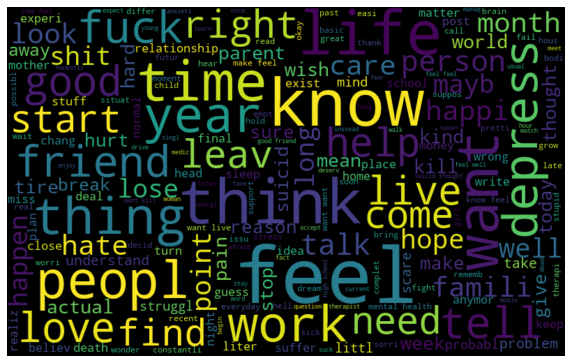

In [ ]:
all_words = ' '.join([text for text in df['cleaned_text']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Sentiment Analysis

In [ ]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['cleaned_text'].apply(polarity)
df['subjectivity'] = df['cleaned_text'].apply(subjectivity)

In [ ]:
df.head()

,class,cleaned_text,polarity,subjectivity
0,depression,recent breakup want friend talk thing hurt want lose feel pain stop hurt want hurt want speak know hurt know love wish meet pain lose feel,0.250000,0.425000
1,depression,know navig feel feel stretch understand pleasantli fine suicid self loath minut step suffer poor mental health year turn week feel asham thought covid hard transit especi move citi month start loc...,0.253788,0.553788
2,depression,month tell depress week particular happen feel bother sleep thing know problem awar want suffoc clingi thing usual love right kind feel suggest gladli accept frank tell bother time depress,0.167007,0.383673
3,suicide,exhaust think final rest think mayb thing start settl hurdl come month find girlfriend leav parent reveal want divorc grandad hospitalis littl sister rush possibl brain damag fuck hate like life k...,-0.221429,0.678525
4,normal,feel strong connect divin self,0.433333,0.733333


Text(0, 0.5, '← Facts — — — — — — — Opinions →')

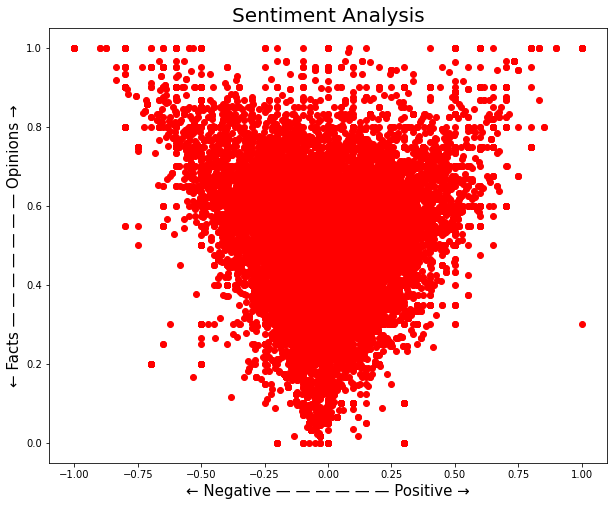

In [ ]:
#visualizations

# Let’s plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(df.index):
    x = df.polarity.loc[Tweets]
    y = df.subjectivity.loc[Tweets]
    plt.scatter(x, y, color='Red')
 
 
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)

In [ ]:
# Creating function for calculating positive, negative and neutral
# More than 1 --> Positive, equal to 0 --> neutral and less than 0 --> Negative
def ratio(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1
df['analysis'] = df['polarity'].apply(ratio)

In [ ]:
df

,class,cleaned_text,polarity,subjectivity,analysis
0,depression,recent breakup want friend talk thing hurt want lose feel pain stop hurt want hurt want speak know hurt know love wish meet pain lose feel,0.250000,0.425000,1
1,depression,know navig feel feel stretch understand pleasantli fine suicid self loath minut step suffer poor mental health year turn week feel asham thought covid hard transit especi move citi month start loc...,0.253788,0.553788,1
2,depression,month tell depress week particular happen feel bother sleep thing know problem awar want suffoc clingi thing usual love right kind feel suggest gladli accept frank tell bother time depress,0.167007,0.383673,1
3,suicide,exhaust think final rest think mayb thing start settl hurdl come month find girlfriend leav parent reveal want divorc grandad hospitalis littl sister rush possibl brain damag fuck hate like life k...,-0.221429,0.678525,-1
4,normal,feel strong connect divin self,0.433333,0.733333,1
...,...,...,...,...,...
30784,normal,confid feel prepar graduat,0.000000,0.000000,0
30785,normal,live room feel come window cuddl gorgeou puppi,0.136364,0.500000,1
30786,normal,feel incred listless albuquerqu weather improv,0.000000,0.000000,0
30787,normal,feel safe trust,0.500000,0.500000,1


In [ ]:
df['analysis'].value_counts()

-1    11937
 1    11166
 0     7681
Name: analysis, dtype: int64

In [ ]:
df.head()

,class,cleaned_text,polarity,subjectivity,analysis
0,depression,recent breakup want friend talk thing hurt want lose feel pain stop hurt want hurt want speak know hurt know love wish meet pain lose feel,0.250000,0.425000,1
1,depression,know navig feel feel stretch understand pleasantli fine suicid self loath minut step suffer poor mental health year turn week feel asham thought covid hard transit especi move citi month start loc...,0.253788,0.553788,1
2,depression,month tell depress week particular happen feel bother sleep thing know problem awar want suffoc clingi thing usual love right kind feel suggest gladli accept frank tell bother time depress,0.167007,0.383673,1
3,suicide,exhaust think final rest think mayb thing start settl hurdl come month find girlfriend leav parent reveal want divorc grandad hospitalis littl sister rush possibl brain damag fuck hate like life k...,-0.221429,0.678525,-1
4,normal,feel strong connect divin self,0.433333,0.733333,1


In [ ]:
df['analysis'] = df['analysis'].replace([-1,0,1],[0,1,2])

In [ ]:
df['analysis'].value_counts()

0    11937
2    11166
1     7681
Name: analysis, dtype: int64

here 0 means normal text, 1 means suicide tweets and 2 means depression tweets

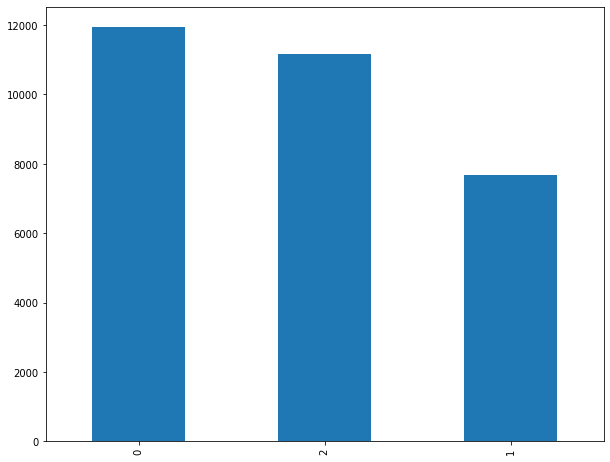

In [ ]:
# Plotting
df['analysis'].value_counts().plot(kind = 'bar')
plt.show()

#Word Clouds

word cloud for positive words

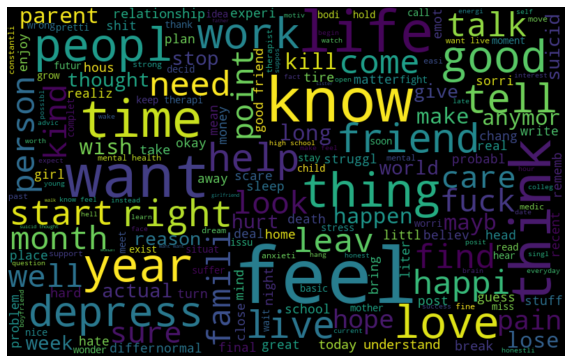

In [ ]:
positive_words =' '.join([text for text in df['cleaned_text'][df['analysis'] == 2]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

word cloud for depressive words

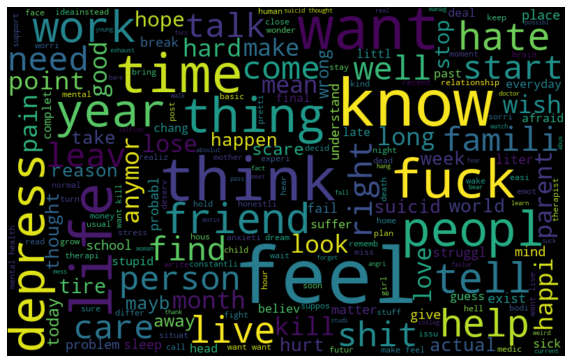

In [ ]:
depressive_words =' '.join([text for text in df['cleaned_text'][df['analysis'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

#Model Building

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(df['cleaned_text'])
cv.shape

(30784, 13696)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(cv,df['analysis'] , test_size=.2,stratify=df['analysis'], random_state=42)

#MODEL TRAINING

#XGBoost Classifier

In [ ]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))

0.9420172161767094


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,prediction_xgb))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2388
           1       0.97      0.99      0.98      1536
           2       0.93      0.92      0.93      2233

    accuracy                           0.94      6157
   macro avg       0.95      0.95      0.95      6157
weighted avg       0.94      0.94      0.94      6157



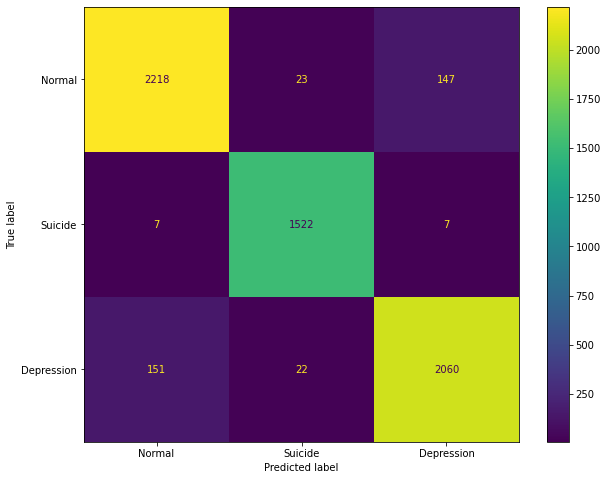

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,prediction_xgb)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['Normal','Suicide','Depression'])
cm_display.plot()
plt.show()

#Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

0.8733149261003735


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2388
           1       0.92      0.97      0.94      1536
           2       0.89      0.79      0.84      2233

    accuracy                           0.87      6157
   macro avg       0.88      0.88      0.88      6157
weighted avg       0.87      0.87      0.87      6157



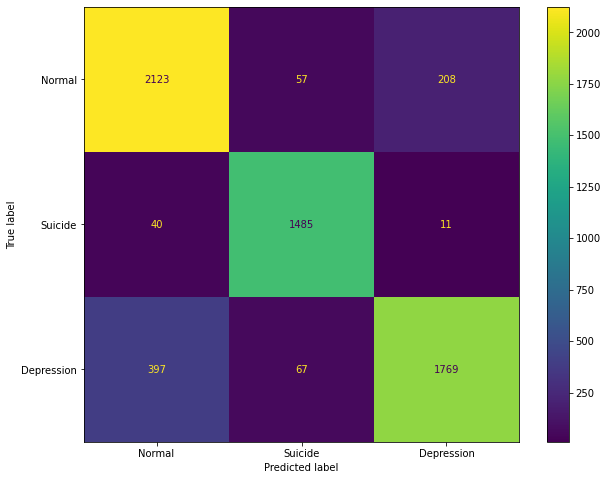

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,prediction_rf)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['Normal','Suicide','Depression'])
cm_display.plot()
plt.show()

#Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

0.9504628877700179


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2388
           1       0.95      0.99      0.97      1536
           2       0.95      0.94      0.94      2233

    accuracy                           0.95      6157
   macro avg       0.95      0.95      0.95      6157
weighted avg       0.95      0.95      0.95      6157



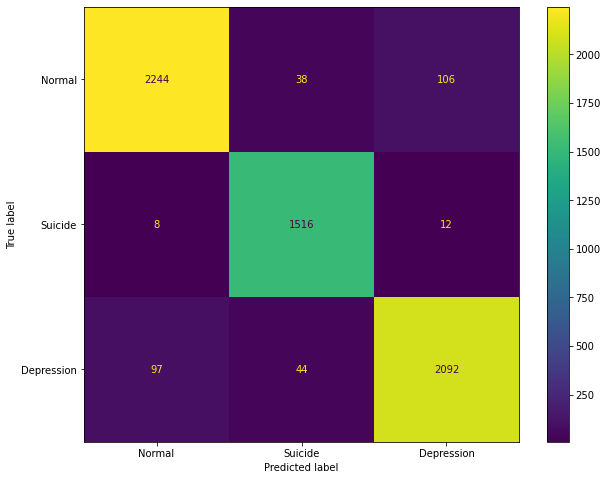

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,prediction_lr)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['Normal','Suicide','Depression'])
cm_display.plot()
plt.show()

#Support Vector Machines (SVM)

In [ ]:
svc = svm.SVC()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)
print(accuracy_score(prediction_svc,y_test))

0.8570732499593958


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,prediction_svc))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2388
           1       0.80      0.99      0.88      1536
           2       0.87      0.81      0.84      2233

    accuracy                           0.86      6157
   macro avg       0.85      0.87      0.86      6157
weighted avg       0.86      0.86      0.86      6157



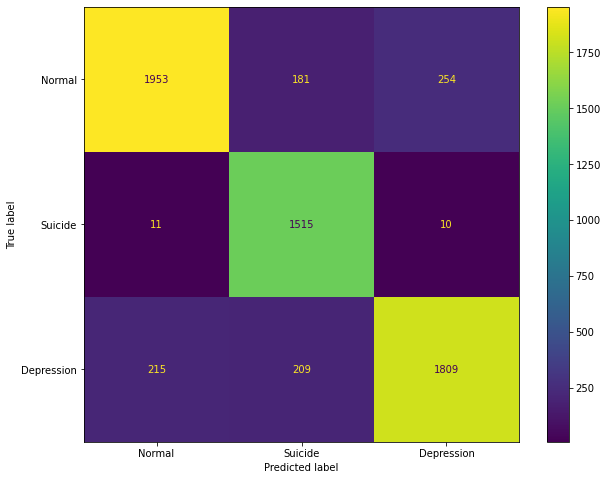

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,prediction_svc)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['Normal','Suicide','Depression'])
cm_display.plot()
plt.show()